<a href="https://colab.research.google.com/github/DurdonaOK/Machine-Learning/blob/main/Driving_Behaviour_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

train = pd.read_csv('train_motion_data.csv')
test = pd.read_csv('test_motion_data.csv')

print(train.head())
print(train['Class'].value_counts())

       AccX      AccY      AccZ     GyroX     GyroY     GyroZ   Class  \
0  0.000000  0.000000  0.000000  0.059407 -0.174707  0.101938  NORMAL   
1 -1.624864 -1.082492 -0.204183 -0.028558  0.051313  0.135536  NORMAL   
2 -0.594660 -0.122410  0.220502 -0.019395 -0.029322  0.087888  NORMAL   
3  0.738478 -0.228456  0.667732  0.069791 -0.029932  0.054902  NORMAL   
4  0.101741  0.777568 -0.066730  0.030696 -0.003665  0.054902  NORMAL   

   Timestamp  
0    3581629  
1    3581630  
2    3581630  
3    3581631  
4    3581631  
Class
SLOW          1331
NORMAL        1200
AGGRESSIVE    1113
Name: count, dtype: int64


In [ ]:
#check for missing values
print(train.isnull().sum())

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64


In [ ]:
#check for class imbalance
print(train['Class'].value_counts())


Class
SLOW          1331
NORMAL        1200
AGGRESSIVE    1113
Name: count, dtype: int64


In [ ]:
#checking for outliers
print(train.describe())

              AccX         AccY         AccZ        GyroX        GyroY  \
count  3644.000000  3644.000000  3644.000000  3644.000000  3644.000000   
mean      0.040467    -0.073418     0.008271     0.001593    -0.001273   
std       0.985653     0.903408     0.985061     0.066918     0.126205   
min      -4.636523    -4.699795    -7.143998    -0.751822    -1.587028   
25%      -0.550695    -0.592540    -0.558464    -0.028558    -0.053756   
50%       0.003931    -0.080833     0.002262     0.001985    -0.001833   
75%       0.595987     0.452401     0.556157     0.031918     0.051313   
max       4.985548     4.245151     5.171739     0.849255     1.679879   

             GyroZ     Timestamp  
count  3644.000000  3.644000e+03  
mean      0.007949  3.582707e+06  
std       0.115687  6.421479e+02  
min      -1.236468  3.581629e+06  
25%      -0.029398  3.582121e+06  
50%       0.002978  3.582702e+06  
75%       0.040852  3.583270e+06  
max       1.190500  3.583791e+06  


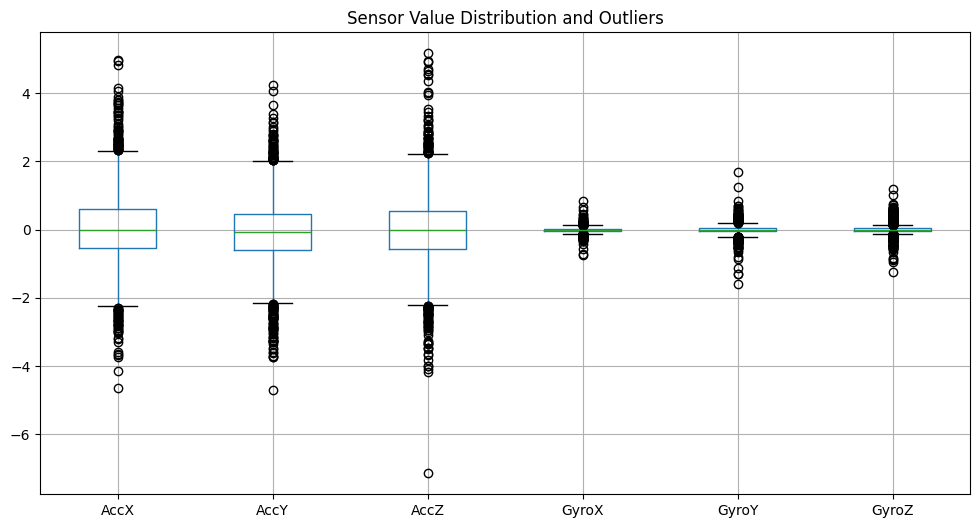

In [ ]:
#visualization
import matplotlib.pyplot as plt
sensor_cols = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']
train[sensor_cols].boxplot(figsize=(12, 6))
plt.title("Sensor Value Distribution and Outliers")
plt.show()

In [ ]:
#preprocessing
import tensorflow
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
train['Class'] = le.fit_transform(train['Class'])

y_train = to_categorical(train['Class'])

In [ ]:
print(y_train)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
#normalize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(train[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']])
X_test = scaler.transform(test[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']])

In [19]:
#build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(6,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
#compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3891 - loss: 1.0716 - val_accuracy: 0.0000e+00 - val_loss: 1.6254
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4605 - loss: 1.0239 - val_accuracy: 0.0000e+00 - val_loss: 1.5212
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4737 - loss: 1.0164 - val_accuracy: 0.0000e+00 - val_loss: 1.5594
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4818 - loss: 1.0050 - val_accuracy: 0.0000e+00 - val_loss: 1.6041
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4977 - loss: 1.0061 - val_accuracy: 0.0000e+00 - val_loss: 1.5136
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5034 - loss: 0.9857 - val_accuracy: 0.0000e+00 - val_loss: 1.4275
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4795 - loss: 1.0045 - val_accuracy: 0.0000e+00 - val_loss: 1.5625
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4959 - loss: 1.0043 - v

In [22]:
y_test_true = le.transform(test['Class'])

In [23]:
#predict
predictions = model.predict(X_test)
y_test_pred = predictions.argmax(axis=1)  # Convert softmax outputs to class indices

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [27]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(train['Class'])
weights = compute_class_weight('balanced', classes=classes, y=train['Class'])
class_weight = dict(zip(range(len(classes)), weights))

# Then pass to training:
model.fit(X_train, y_train, epochs=30, batch_size=32, class_weight=class_weight)

Epoch 1/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4923 - loss: 0.9887
Epoch 2/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4841 - loss: 1.0071
Epoch 3/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4764 - loss: 1.0102
Epoch 4/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5011 - loss: 0.9759
Epoch 5/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5085 - loss: 0.9874
Epoch 6/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4875 - loss: 1.0011
Epoch 7/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4875 - loss: 1.0075
Epoch 8/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5133 - loss: 0.9819
Epoch 9/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5031 - loss: 0.9904
Epoch 10/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4830 - loss: 0.9894
Epoch 11/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5058 - loss: 0.9933
Epoch 12/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

              precision    recall  f1-score   support

  AGGRESSIVE       0.44      0.45      0.44       814
      NORMAL       0.33      0.74      0.46       997
        SLOW       0.33      0.00      0.01      1273

    accuracy                           0.36      3084
   macro avg       0.37      0.40      0.30      3084
weighted avg       0.36      0.36      0.27      3084



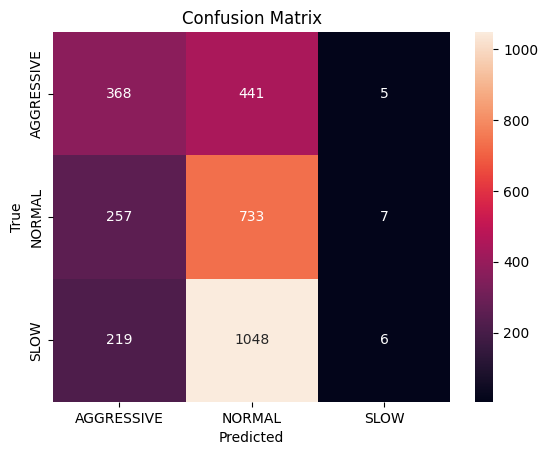

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report with precision, recall, f1-score
print(classification_report(y_test_true, y_test_pred, target_names=le.classes_))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_true, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
